<a href="https://colab.research.google.com/github/mast0w/API-obesity-levels-prediction-/blob/main/Projet_python_for_DA_Alb%C3%A9ric_et_Victor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Estimation of obesity levels Notebook 
####*Albéric Dufaure & Victor Duleba*


Dataset is based on eating habits and physical condition in individuals from Colombia, Peru and Mexico

Data link : https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+#

Article : https://www.sciencedirect.com/science/article/pii/S2352340919306985?via%3Dihub

We will try to **generate intelligent computational tools to identify the obesity level** of an individual and to build recommender systems that monitor obesity levels.

In [ ]:
%autosave 60

Autosaving every 60 seconds


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import StandardScaler
sns.set(rc={'figure.figsize':(14,9)})#to change size of countplot

Note : The attributes related with eating habits are: Frequent consumption of high caloric food (FAVC), Frequency of consumption of vegetables (FCVC), Number of main meals (NCP), Consumption of food between meals (CAEC), Consumption of water daily (CH20), and Consumption of alcohol (CALC). The attributes related with the physical condition are: Calories consumption monitoring (SCC), Physical activity frequency (FAF), Time using technology devices (TUE), Transportation used (MTRANS),

##**Importing Data**

In [ ]:
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

## **Data exploration**

In [ ]:
print(df.isnull().values.sum()) #no missing values

0


In [ ]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [ ]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


Content of variables :

In [ ]:
print(set(df["family_history_with_overweight"]))
print(set(df["FAVC"]))
print(sorted(set(df["FCVC"])))
print(set(df["CAEC"]))
print(set(df["SMOKE"]))
print(set(df["SCC"]))
print(set(df["CALC"]))
print(set(df["MTRANS"]))
print(set(df["NObeyesdad"]))
print(sorted(set(df["Age"])))

{'yes', 'no'}
{'yes', 'no'}
[1.0, 1.003566, 1.005578, 1.00876, 1.0311489999999999, 1.036159, 1.036414, 1.052699, 1.053534, 1.063449, 1.064162, 1.067909, 1.078529, 1.081585, 1.0816, 1.096455, 1.108663, 1.116068, 1.118436, 1.122127, 1.123672, 1.123939, 1.133844, 1.140615, 1.142468, 1.1640620000000002, 1.168856, 1.188089, 1.202075, 1.203754, 1.204855, 1.2062760000000001, 1.212908, 1.21498, 1.220024, 1.261288, 1.263216, 1.264234, 1.270448, 1.276858, 1.27785, 1.289315, 1.303878, 1.3068440000000001, 1.31415, 1.3177290000000002, 1.321028, 1.3307, 1.34138, 1.344854, 1.362441, 1.368978, 1.369529, 1.387489, 1.392665, 1.397468, 1.412566, 1.428289, 1.431346, 1.443674, 1.450218, 1.451337, 1.452524, 1.455602, 1.4577579999999999, 1.469384, 1.475906, 1.4827219999999999, 1.4925, 1.492834, 1.5179120000000002, 1.518966, 1.5216040000000002, 1.522001, 1.5244280000000001, 1.5283309999999999, 1.537505, 1.557287, 1.562804, 1.567101, 1.5700889999999998, 1.572036, 1.57223, 1.585183, 1.588114, 1.588782, 1.592183

##**Data Visualization**

**Repartition of targeted categories**
: seems to be approximately equal 

Counter({'Obesity_Type_I': 351, 'Obesity_Type_III': 324, 'Obesity_Type_II': 297, 'Overweight_Level_I': 290, 'Overweight_Level_II': 290, 'Normal_Weight': 287, 'Insufficient_Weight': 272})


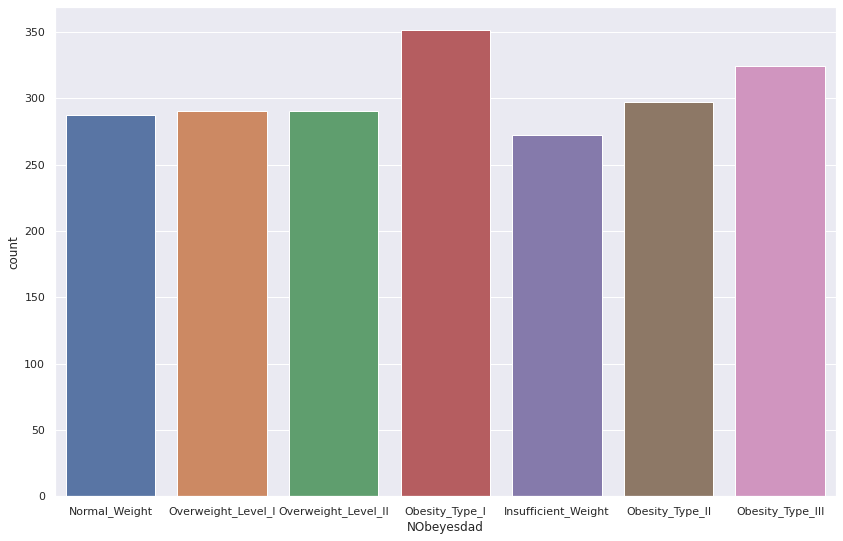

In [ ]:
print(Counter(df.NObeyesdad))
sns.countplot(x='NObeyesdad', data=df)

**Repartion of transports means** :

* More than 75% of people use public transport. Important to notice this inequality => will be difficult to analyse Bike or Motorbike data.
* Corpulences of people taking public transports:
100 peoples more in category 'Obesity type III' than in any other
* Obvious correlation between the target category 'normal_weight' and walking.
We can notice that no obesity type III walks.





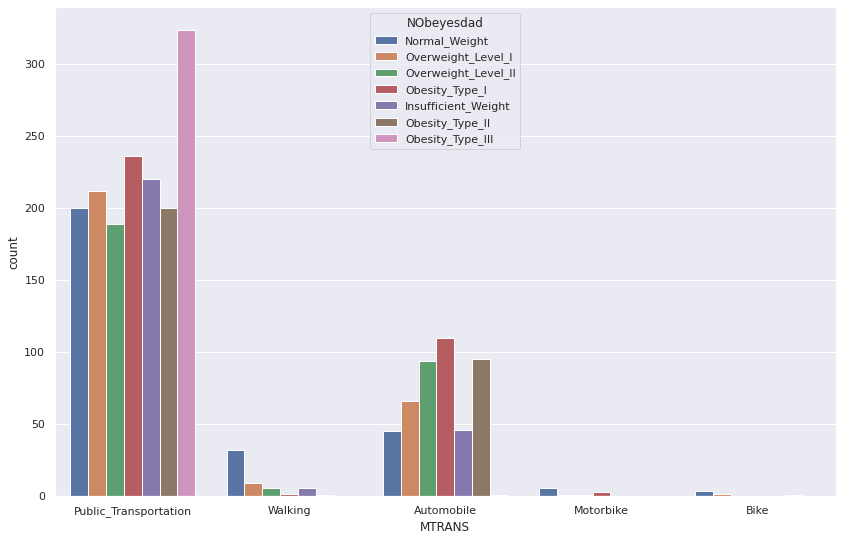

In [ ]:
#sns.barplot(x= data.groupby("MTRANS").count().index, y= data.groupby("MTRANS").count().mean(axis=1))
sns.countplot(x= 'MTRANS', hue="NObeyesdad", data = df)

**Relation between high alcohol consumption and corpulence** :
we can see that no one who suffered from Obesity type III don't drink alcohol 

ie: Every people who who suffered from Obesity type III drinks alcohol (most drink sometimes)

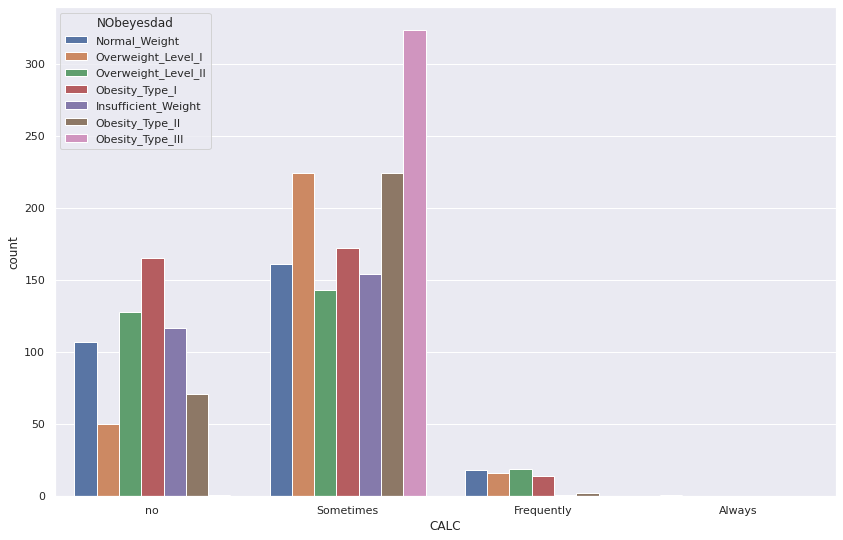

In [ ]:
sns.countplot(x="CALC", hue="NObeyesdad", data=df)

**Relation between family history and corpulence** :
No family history => proportion of obese is weak compared to normal and insufficient weight
Family history seems to have an impact on corpulence

In [ ]:
df.groupby(['family_history_with_overweight','NObeyesdad']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

In [ ]:
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource
from bokeh.models.tools import HoverTool

from bokeh.palettes import Spectral5
from bokeh.transform import factor_cmap
output_file('test.html')

In [ ]:
!pip install pandas_bokeh
import pandas_bokeh
pd.set_option('plotting.backend','pandas_bokeh')
pandas_bokeh.output_notebook()

**Time using technology devices - Physical activity frequency by corpulence**: 
* If you select only Obesity type III every points are stuck on bottom left of the graph : low frequency of physical activity but also surprizingly they have a low consumption of electronic devices.
* Can't use data of normal weight (not enough and seems to be generated)
* Obesity type II have low physical activity AND high consumption of electronic devices ...

**Bokeh plot : you can interact with !**

In [ ]:
df.plot_bokeh(kind='scatter',x='TUE',y='FAF',category='NObeyesdad') #you

/usr/local/lib/python3.6/dist-packages/pandas_bokeh/plot.py:1331: UserWarning: There are more than 5 categories in the scatterplot. The legend might be crowded, to hide the axis you can pass 'legend=False' as an optional argument.
  "There are more than 5 categories in the scatterplot. The legend might be crowded, to hide the axis you can pass 'legend=False' as an optional argument."


Figure(id='3918', ...)

In [ ]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


##**Data Pre Processing**

One hot encoding of columns Gender & Mtrans


In [ ]:
new_data = df.drop(columns = ["Gender","MTRANS","Height","Weight"])
#on enleve les colonnes Height et Weight car cela rend la tache trop facile

new_data["Male"] = [1 if x == "Male" else 0 for x in df["Gender"]]
new_data["Female"] =  [1 if x == "Female" else 0 for x in df["Gender"]]

new_data["Public_Transportation"] = [1 if x == "Public_Transportation" else 0 for x in df["MTRANS"]]
new_data["Automobile"] = [1 if x == "Automobile" else 0 for x in df["MTRANS"]]
new_data["Motorbike"] = [1 if x == "Motorbike" else 0 for x in df["MTRANS"]]
new_data["Bike"] = [1 if x == "Bike" else 0 for x in df["MTRANS"]]
new_data["Walking"] = [1 if x == "Walking" else 0 for x in df["MTRANS"]]

Replacing strings with numerics or booleans

In [201]:
new_data=new_data.replace("no", False)#conversion en booléen des yes no
new_data=new_data.replace("yes", True)
new_data=new_data.replace("Sometimes",1)
new_data=new_data.replace("Frequently",2)
new_data=new_data.replace("Always", 3)
new_data["CALC"]=new_data["CALC"].replace(False, 0)
new_data["CAEC"]=new_data["CALC"].replace(False, 0)

new_data

,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,NObeyesdad,Male,Female,Public_Transportation,Automobile,Motorbike,Bike,Walking
0,21.000000,True,False,2.0,3.0,0,False,2.000000,False,0.000000,1.000000,0,Normal_Weight,0,1,1,0,0,0,0
1,21.000000,True,False,3.0,3.0,1,True,3.000000,True,3.000000,0.000000,1,Normal_Weight,0,1,1,0,0,0,0
2,23.000000,True,False,2.0,3.0,2,False,2.000000,False,2.000000,1.000000,2,Normal_Weight,1,0,1,0,0,0,0
3,27.000000,False,False,3.0,3.0,2,False,2.000000,False,2.000000,0.000000,2,Overweight_Level_I,1,0,0,0,0,0,1
4,22.000000,False,False,2.0,1.0,1,False,2.000000,False,0.000000,0.000000,1,Overweight_Level_II,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,True,True,3.0,3.0,1,False,1.728139,False,1.676269,0.906247,1,Obesity_Type_III,0,1,1,0,0,0,0
2107,21.982942,True,True,3.0,3.0,1,False,2.005130,False,1.341390,0.599270,1,Obesity_Type_III,0,1,1,0,0,0,0
2108,22.524036,True,True,3.0,3.0,1,False,2.054193,False,1.414209,0.646288,1,Obesity_Type_III,0,1,1,0,0,0,0
2109,24.361936,True,True,3.0,3.0,1,False,2.852339,False,1.139107,0.586035,1,Obesity_Type_III,0,1,1,0,0,0,0


##**Models**

###Spliting data

In [ ]:
from sklearn.model_selection import train_test_split
X = new_data.drop(columns = ["NObeyesdad"])
Y = new_data["NObeyesdad"]
X_train, X_test, y_train, y_test = train_test_split(X,Y) #defaut: test_size = 0.25

###Function to run all desired models

Here we choose 5 differents models : 
* Random Forest
* Decision tree
* KNN
* SVM
* Gradient Boosting

We display accuracy to choose the best model for our problem

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics 
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

def run_models(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame):
    

    ss = StandardScaler()
    X_train_scaled = ss.fit_transform(X_train)
    X_test_scaled = ss.transform(X_test)
    models = [          
          ('Random Forest', RandomForestClassifier(criterion = "entropy",max_depth = None,n_estimators = 120)),
          ('Decision Tree', DecisionTreeClassifier()),                                                 
          ('KNN', KNeighborsClassifier()),
          ('SVM', SVC()),
          ('Gradient Boosting',GradientBoostingClassifier()),
        ]  
    
    for name, model in models:        
        #sans normalisation
        clf = model.fit(X_train_scaled, y_train)
        y_pred = clf.predict(X_test_scaled)
        scores = cross_val_score(clf, X, Y, cv=5)
        print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

        # avec normalisation standard
        clf_scaled = model.fit(X_train_scaled, y_train)
        y_pred_scaled = clf_scaled.predict(X_test_scaled)
        """scores_scaled = cross_val_score(clf_scaled, X_train_scaled, y_pred_scaled, cv=5)
        print("%0.2f accuracy (scaled) with a standard deviation of %0.2f" % (scores_scaled.mean(), scores_scaled.std()))"""

        
        #calcul de la précision
        accuracy = round(metrics.accuracy_score(y_test, y_pred),5)
        scaled_accuracy = round(metrics.accuracy_score(y_test, y_pred_scaled),5)
        print(name + ':')        
        print("---------------------------------------------------------------")      
        print("Accuracy:", accuracy)
        print("Accuracy avec normalisation standard:", scaled_accuracy)
        print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred))      
        print("                            -----------------------------------               \n")      
        print("\nClassification Report (ss):\n", metrics.classification_report(y_test, y_pred_scaled))      
        print("                            -----------------------------------               \n")     
        

* When we run models we can see the difficulty of predicting 'Normal_Weight' : always the lowest score. 
* Maybe normal weighted persons have no specific habits (unlike obese type III people).
* Can be explaned by the genetic factor : even if they have 'bad' eating and physical habits they keep a good shape

In [ ]:
#run Decision Trees, Random Forest, KNN and SVM
run_models(X_train, y_train, X_test, y_test)

0.84 accuracy with a standard deviation of 0.12
Random Forest:
---------------------------------------------------------------
Accuracy: 0.86364
Accuracy avec normalisation standard: 0.86174

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.95      0.90      0.92        80
      Normal_Weight       0.64      0.85      0.73        65
     Obesity_Type_I       0.90      0.90      0.90        91
    Obesity_Type_II       0.85      0.97      0.91        72
   Obesity_Type_III       0.99      1.00      0.99        73
 Overweight_Level_I       0.85      0.73      0.78        70
Overweight_Level_II       0.90      0.69      0.78        77

           accuracy                           0.86       528
          macro avg       0.87      0.86      0.86       528
       weighted avg       0.87      0.86      0.86       528

                            -----------------------------------               


Classification Report (ss):
 

In [ ]:
from sklearn.model_selection import GridSearchCV

#gridsearch pour trouver les paramètres optimaux
def hyper_tune(name, clf, parameters, target_names=None): 
    ss = StandardScaler()
    X_train_scaled = ss.fit_transform(X_train)
    X_test_scaled = ss.transform(X_test)
    target_names = target_names
    clf = clf
    search = GridSearchCV(clf, parameters,verbose=True, n_jobs=15, cv=5)
    search.fit(X_train_scaled,y_train)
    y_pred_scaled = search.predict(X_test_scaled)
    print ("Accuracy Score = %3.2f" %(search.score(X_test_scaled,y_test)))
    print (search.best_params_)
    print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred_scaled, target_names=target_names))

In [ ]:
#Nombre d'arbres
n_estimators = [int(x) for x in range(10, 200,10)]

criterion = ['gini','entropy']
max_features = ['auto', 'sqrt', 'log2']
# Nombre max de branches à chaque arbre
max_depth = [int(x) for x in range(10, 100, 10)]
max_depth.append(None)
min_samples_split = [int(x) for x in range(2, 5)]
# Nombre minimum d'echantillons pour créer une branche

min_samples_leaf = [int(x) for x in range(2, 5)]
#Methode pour choisir les échantillons à entrainer pour chaque arbre
bootstrap = [True, False]

parameters = { 'criterion':criterion,
               'n_estimators': n_estimators,
              'max_depth':max_depth,
              'max_features':max_features,
              'min_samples_split':min_samples_split             
               }


hyper_tune('Random Forest',
           RandomForestClassifier(), parameters)

Fitting 5 folds for each of 3420 candidates, totalling 17100 fits


[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:   11.3s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:   47.4s
[Parallel(n_jobs=15)]: Done 420 tasks      | elapsed:  1.7min
[Parallel(n_jobs=15)]: Done 770 tasks      | elapsed:  3.0min
[Parallel(n_jobs=15)]: Done 1220 tasks      | elapsed:  4.8min
[Parallel(n_jobs=15)]: Done 1770 tasks      | elapsed:  7.0min
[Parallel(n_jobs=15)]: Done 2420 tasks      | elapsed:  9.5min
[Parallel(n_jobs=15)]: Done 3170 tasks      | elapsed: 12.5min
[Parallel(n_jobs=15)]: Done 4020 tasks      | elapsed: 15.9min
[Parallel(n_jobs=15)]: Done 4970 tasks      | elapsed: 19.7min
[Parallel(n_jobs=15)]: Done 6020 tasks      | elapsed: 23.8min
[Parallel(n_jobs=15)]: Done 7170 tasks      | elapsed: 28.4min
[Parallel(n_jobs=15)]: Done 8420 tasks      | elapsed: 33.4min
[Parallel(n_jobs=15)]: Done 9770 tasks      | elapsed: 41.0min
[Parallel(n_jobs=15)]: Done 11220 tasks      

Accuracy Score = 0.87
{'criterion': 'entropy', 'max_depth': 90, 'max_features': 'log2', 'min_samples_split': 3, 'n_estimators': 90}

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.95      0.90      0.92        80
      Normal_Weight       0.62      0.86      0.72        65
     Obesity_Type_I       0.91      0.89      0.90        91
    Obesity_Type_II       0.86      0.97      0.92        72
   Obesity_Type_III       0.96      1.00      0.98        73
 Overweight_Level_I       0.93      0.73      0.82        70
Overweight_Level_II       0.89      0.70      0.78        77

           accuracy                           0.87       528
          macro avg       0.87      0.86      0.86       528
       weighted avg       0.88      0.87      0.87       528



Best model is Random Forest we will use this model with the results of GridSearch

In [193]:
clf = RandomForestClassifier(criterion= 'entropy', max_depth= 90, max_features= 'log2', min_samples_split= 3, n_estimators= 9)

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

# Entrainement
clf = clf.fit(X_train,y_train)

#Prediction
y_pred = clf.predict(X_test)
accuracy = round(metrics.accuracy_score(y_test, y_pred),5)
accuracy

0.82765

##**Exporting best trained model**

In [ ]:
import pickle
from google.colab import files

pickle.dump(clf, open('clf_model.pickle', 'wb'))
files.download('clf_model.pickle') #downloading .pickle

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Lader of top feature by importance**

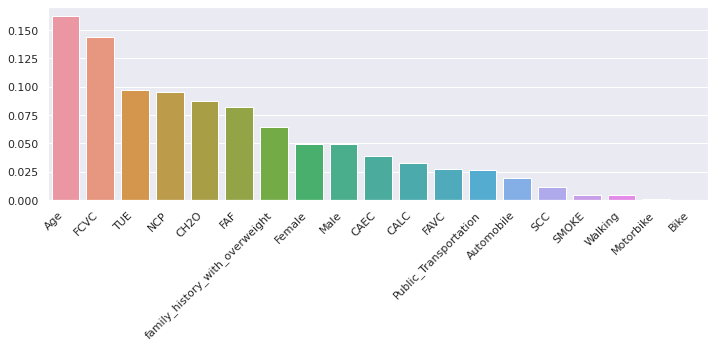

In [ ]:
#lader of top feature by importance
feature_imp = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
fig = plt.figure(figsize=(10, 5))
#display barplot on graph
sns.barplot(x=feature_imp.index, y=feature_imp)

# rotate legend to avoid superposition
plt.xticks(rotation=45, horizontalalignment='right')

plt.tight_layout()
plt.show()